1. 기본 사용해보기

In [1]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

# Perform object detection on an image using the model
result = model('zidane.jpg')

In [13]:
## 결과를 확인해보세요
result[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

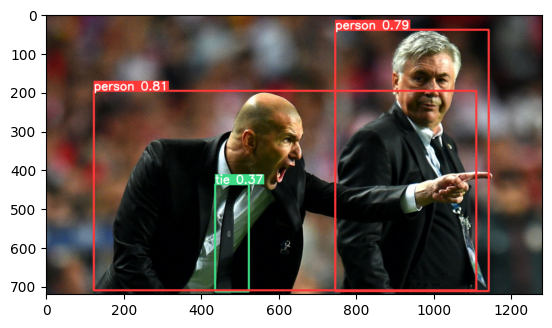

In [19]:
from PIL import Image
import matplotlib.pyplot as plt
im_array = result[0].plot()
im = Image.fromarray(im_array[..., ::-1])
plt.imshow(im)
plt.show()

2. 각각 객체만 가져와서 표시해보기

In [14]:
import cv2
# 결과 객체에서 boxes 정보 가져오기 
boxes = result[0].boxes
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 27.], device='cuda:0')
conf: tensor([0.8053, 0.7935, 0.3706], device='cuda:0')
data: tensor([[1.2346e+02, 1.9717e+02, 1.1106e+03, 7.1050e+02, 8.0530e-01, 0.0000e+00],
        [7.4657e+02, 4.0800e+01, 1.1421e+03, 7.1237e+02, 7.9345e-01, 0.0000e+00],
        [4.3681e+02, 4.3712e+02, 5.2354e+02, 7.1373e+02, 3.7058e-01, 2.7000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[617.0099, 453.8382, 987.0950, 513.3324],
        [944.3209, 376.5857, 395.5087, 671.5706],
        [480.1738, 575.4266,  86.7241, 276.6064]], device='cuda:0')
xywhn: tensor([[0.4820, 0.6303, 0.7712, 0.7130],
        [0.7378, 0.5230, 0.3090, 0.9327],
        [0.3751, 0.7992, 0.0678, 0.3842]], device='cuda:0')
xyxy: tensor([[ 123.4624,  197.1720, 1110.5574,  710.5044],
        [ 746.5665,   40.8004, 1142.0752,  712.3710],
        [ 436.8117,  437.1234,  523.5358,  713.7298]], d

In [15]:
names = result[0].names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [21]:
boxes_xyxy = boxes.xyxy.cpu().numpy()  # .cpu().numpy()는 GPU에서 계산된 텐서를 CPU로 옮긴 후 NumPy 배열로 변환합니다.
class_ids = boxes.cls.cpu().numpy()  # 클래스 ID

# 원본 이미지 로드
orig_img = result[0].orig_img  # 이 예제에서는 이미 로드된 이미지를 사용합니다.

# # 경계 상자를 이용하여 ROI 추출하기
# 각 객체에 대한 경계 상자를 이용하여 ROI 추출 및 활용
for i, (box, class_id) in enumerate(zip(boxes_xyxy, class_ids)):
    # 경계 상자 좌표를 정수형으로 변환
    x1, y1, x2, y2 = map(int, box[:4])
    
    # 원본 이미지에서 해당 영역 추출
    roi = orig_img[y1:y2, x1:x2]
    class_name = names[class_id]
    print(class_name)
    
    # 추출된 ROI를 활용 (예: 화면에 표시하기)
    cv2.imshow(f'{class_name}_ROI', roi)
    cv2.waitKey(0)

cv2.destroyAllWindows()

person
person
tie


3. 학습 시켜보기

In [26]:
# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set
# results = model("zidane.jpg")  # predict on an image

Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=coco128.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 6.66M/6.66M [00:01<00:00, 5.55MB/s]
Unzipping D:\Projects\workspace\7일차_이미지데이터전처리\datasets\coco128.zip to D:\Projects\workspace\7일차_이미지데이터전처리\datasets\coco128...: 100%|██████████| 263/263 [00:00<00:00, 1547.29file/s]

Dataset download success  (5.1s), saved to D:\Projects\workspace\7_\datasets



100%|██████████| 755k/755k [00:01<00:00, 512kB/s] 


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Transferred 70/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed 


train: Scanning D:\Projects\workspace\7일차_이미지데이터전처리\datasets\coco128\labels\train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 483.71it/s]

train: New cache created: D:\Projects\workspace\7_\datasets\coco128\labels\train2017.cache



val: Scanning D:\Projects\workspace\7일차_이미지데이터전처리\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.64G      3.015      4.767      2.562        217        640: 100%|██████████| 8/8 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        128        929     0.0292    0.00111   0.000282   9.18e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.46G      2.967      4.748      2.502        218        640: 100%|██████████| 8/8 [00:01<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.93it/s]

                   all        128        929     0.0288    0.00189   0.000296   8.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.69G      2.942      4.621      2.528        215        640: 100%|██████████| 8/8 [00:01<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        128        929   3.89e-05    0.00582   0.000372   8.38e-05



3 epochs completed in 0.003 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 6.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 6.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


                   all        128        929   3.89e-05    0.00582   0.000374   8.44e-05
                person        128        254    0.00276      0.413     0.0266    0.00599
               bicycle        128          6          0          0          0          0
                   car        128         46          0          0          0          0
            motorcycle        128          5          0          0          0          0
              airplane        128          6          0          0          0          0
                   bus        128          7          0          0          0          0
                 train        128          3          0          0          0          0
                 truck        128         12          0          0          0          0
                  boat        128          6          0          0          0          0
         traffic light        128         14          0          0          0          0
             stop sig

val: Scanning D:\Projects\workspace\7일차_이미지데이터전처리\datasets\coco128\labels\train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


                   all        128        929   3.89e-05    0.00582   0.000346   8.06e-05
                person        128        254    0.00276      0.413     0.0246    0.00572
               bicycle        128          6          0          0          0          0
                   car        128         46          0          0          0          0
            motorcycle        128          5          0          0          0          0
              airplane        128          6          0          0          0          0
                   bus        128          7          0          0          0          0
                 train        128          3          0          0          0          0
                 truck        128         12          0          0          0          0
                  boat        128          6          0          0          0          0
         traffic light        128         14          0          0          0          0
             stop sig

4. 로보플로우 사이트를 이용한 데이터 학습

In [ ]:
# !pip install roboflow --user

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="0NcboRhp7evoa6Re3Nw9")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.42, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Rock-Paper-Scissors-SXSW-14 in yolov8:: 100%|██████████| 14682/14682 [00:07<00:00, 2001.98it/s]


In [2]:
model = YOLO('yolov8n.pt')
results = model.train(data=r"D:\Projects\workspace\7일차_이미지데이터전처리\Rock-Paper-Scissors-SXSW-14", epochs=1)

Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4080 Laptop GPU, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\Projects\workspace\7_\Rock-Paper-Scissors-SXSW-14, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

RuntimeError: Dataset 'D://Projects/workspace/7_/Rock-Paper-Scissors-SXSW-14' error  [Errno 13] Permission denied: 'D:\\Projects\\workspace\\7_\\Rock-Paper-Scissors-SXSW-14'